Klasifikasi Gambar
----------------------------

#### Mengunduh CIFAR10



In [1]:
import torch
import torchvision
import torchvision.transforms as transforms

Unduh cifar10 dataset (yang berisi 60000 gambar kecil beserta labelnya), lalu gunakan transformasi data untuk merubah ke bentuk tensor minibatch yang masing-masing berisi 8 gambar
Output dari torchvision dataset adalah PILImage antara [0, 1].
Transformasi menjadi tensor dengan rentang antara [-1, 1].



<div class="alert alert-info"><h4>Catatan</h4><p> Jika menggunakan windows dan mengeluarkan BrokenPipeError, coba atur num_worker dari torch.utils.data.DataLoader() menjadi 0.</p></div>



In [2]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 8

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


Cek beberapa gambar

torch.Size([8, 3, 32, 32])
tensor([[[[ 0.0431, -0.0039, -0.0039,  ..., -0.3255, -0.4353, -0.3333],
          [ 0.1373,  0.0667,  0.0196,  ..., -0.3176, -0.4667, -0.2627],
          [ 0.1451,  0.1608,  0.0980,  ..., -0.4510, -0.5294, -0.2863],
          ...,
          [-0.3490, -0.2941, -0.2392,  ..., -0.3490, -0.5294, -0.5765],
          [-0.3176, -0.3569, -0.3647,  ..., -0.3490, -0.4824, -0.5608],
          [-0.2000, -0.2392, -0.3412,  ..., -0.4039, -0.4431, -0.5765]],

         [[-0.0353, -0.0510, -0.0588,  ..., -0.4118, -0.4980, -0.3725],
          [-0.0353, -0.0196, -0.0431,  ..., -0.3961, -0.5137, -0.2706],
          [-0.0588,  0.0039,  0.0118,  ..., -0.4667, -0.5451, -0.3098],
          ...,
          [-0.4980, -0.4588, -0.4118,  ..., -0.4275, -0.6392, -0.6549],
          [-0.4275, -0.4980, -0.5216,  ..., -0.4510, -0.6078, -0.6471],
          [-0.2549, -0.3176, -0.3961,  ..., -0.4902, -0.5451, -0.6235]],

         [[-0.1373, -0.1608, -0.1608,  ..., -0.5373, -0.5765, -0.4510],
   

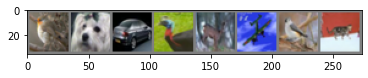

bird  dog   car   bird  deer  plane bird  cat  


In [3]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

print(images.shape)
print(images)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

### Soal

Buat 3 linear layer untuk meneruskan convolutional layer berikut (kali ini inputnya memiliki 3-channel)



In [4]:
import torch.nn as nn
import torch.nn.functional as F


class CovNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


covnet = CovNet()

### Optimisasi
Gunakan cross-entropy dan SGD dengan momentum.



In [5]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(covnet.parameters(), lr=0.001, momentum=0.9)

### Soal

Ambil data dari iterator dalam bentuk MiniBatch, masukan menjadi input, dan optimisasi sebanyak 5 epoch. 
Tampilkan nilai dari akumulasi loss untuk memastikan optimisasi berjalan dengan baik. Lalu plot nilai loss dan hitung total waktu yang dibutuhkan.



[1] loss: 1.7846431259250641
[2] loss: 1.3927875149297715
[3] loss: 1.246384281873703
[4] loss: 1.1501904132580758
[5] loss: 1.0752133297920228
Finished Training, time: 158.698798


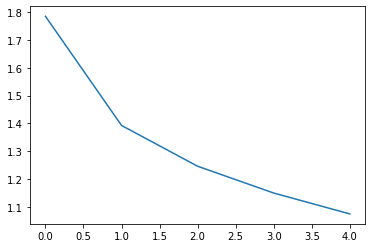

In [ ]:
import time
start = time.time()

Loss = []
for epoch in range(5):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = covnet(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        # print statistics
        running_loss += loss.item()

    print(f'[{epoch + 1}] loss: {running_loss / (i+1)}')
    Loss.append(running_loss / (i+1))
        
plt.plot(Loss)
end = time.time()
print('Finished Training, time: %f'%(end-start))



Simpan model yang sudah dilatih



In [ ]:
torch.save(covnet.state_dict(), 'cifar_covnet.pth')

### Tes

Setelah melatih beberapa epoch pada training dataset, cek apakah model sudah mempelajari sesuatu.
Kita akan cek dengan memprediksi output dan membandingkan dengan labelnya. Jika prediksi benar, kita tambah sampel pada daftar prediksi benar.




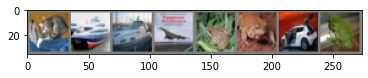

GroundTruth:  cat   ship  ship  plane frog  frog  car   frog 


In [ ]:
dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(8)))

Load model yang telah disimpan


In [ ]:
covnet = CovNet()
covnet.load_state_dict(torch.load('cifar_covnet.pth'))

<All keys matched successfully>

Coba model pada contoh berikut



In [ ]:
outputs = covnet(images)

In [ ]:
_, predicted = torch.max(outputs, 1)

print('Prediksi: ', ' '.join(f'{classes[predicted[j]]:5s}'
                              for j in range(8)))

Prediksi:  cat   ship  ship  ship  frog  frog  cat   deer 


Cek performa pada seluruh test dataset

In [ ]:
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in testloader:
        images, labels = data
        # calculate outputs by running images through the network
        outputs = covnet(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'akurasi pada tes: {100 * correct // total} %')

akurasi pada tes: 57 %


Manakah kelas dengan performa baik dan tidak baik?


In [ ]:
# prepare to count predictions for each class
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

# again no gradients needed
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = covnet(images)
        _, predictions = torch.max(outputs, 1)
        # collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1


# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'akurasi untuk label: {classname:5s} adalah {accuracy:.1f} %')

akurasi untuk label: plane adalah 60.6 %
akurasi untuk label: car   adalah 74.3 %
akurasi untuk label: bird  adalah 54.3 %
akurasi untuk label: cat   adalah 61.7 %
akurasi untuk label: deer  adalah 46.0 %
akurasi untuk label: dog   adalah 33.9 %
akurasi untuk label: frog  adalah 69.6 %
akurasi untuk label: horse adalah 64.2 %
akurasi untuk label: ship  adalah 72.3 %
akurasi untuk label: truck adalah 39.4 %


Menggunakan GPU
----------------

cek apakah perangkat cuda sudah tersedia?

baik data maupun model harus di kirim ke perangkat cuda terlebih dahulu

In [6]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Assuming that we are on a CUDA machine, this should print a CUDA device:

print(device)

cuda


### Soal

Coba gunakan model berikut pada GPU dan bandingkan latensinya dengan CPU



[1] loss: 1.8210616546440124
[2] loss: 1.4183474405527114
[3] loss: 1.254742591190338
[4] loss: 1.1475079710841178
[5] loss: 1.0712367270159722
Finished Training, time: 158.649069
158.6492202281952


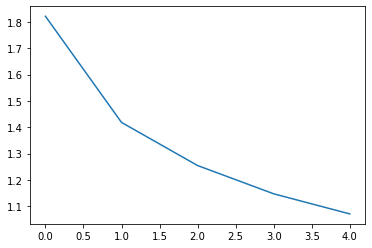

In [7]:
import time

covnet = CovNet().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(covnet.parameters(), lr=0.001, momentum=0.9)

start = time.time()

Loss = []
for epoch in range(5):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = covnet(inputs.to(device))
        loss = criterion(outputs, labels.to(device))
        loss.backward()
        optimizer.step()
        
        # print statistics
        running_loss += loss.item()

    print(f'[{epoch + 1}] loss: {running_loss / (i+1)}')
    Loss.append(running_loss / (i+1))
        
plt.plot(Loss)
end = time.time()
print('Finished Training, time: %f'%(end-start))


end = time.time()
print(end-start)

### Soal

Bandingkan optimisasi SGD, AdaGrad, RMSProp, dan Adam

Untuk dokumentasi bisa dilihat disini https://pytorch.org/docs/stable/optim.html 


### SGD

[1] loss: 2.300561320915222
[2] loss: 2.279242827453613
[3] loss: 2.0591829653930662
[4] loss: 1.8703959502792358
[5] loss: 1.736687238521576
Finished Training, time: 143.161231
143.1613748073578


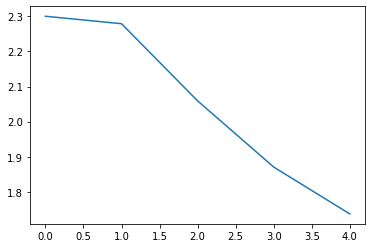

In [ ]:
covnet = CovNet().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(covnet.parameters(), lr=0.001)

start = time.time()

Loss = []
for epoch in range(5):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = covnet(inputs.to(device))
        loss = criterion(outputs, labels.to(device))
        loss.backward()
        optimizer.step()
        
        # print statistics
        running_loss += loss.item()

    print(f'[{epoch + 1}] loss: {running_loss / (i+1)}')
    Loss.append(running_loss / (i+1))
        
plt.plot(Loss)
end = time.time()
print('Finished Training, time: %f'%(end-start))


end = time.time()
print(end-start)

### AdaGrad

[1] loss: 1.9529554207992554
[2] loss: 1.8486676607131958
[3] loss: 1.8036292133903504
[4] loss: 1.7702814869880676
[5] loss: 1.7444311649799347
Finished Training, time: 149.592384
149.59254240989685


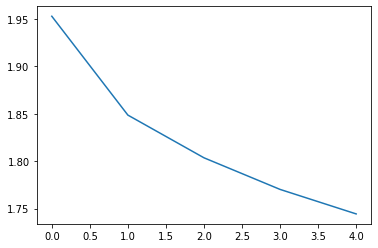

In [ ]:
covnet = CovNet().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adagrad(covnet.parameters(), lr=0.001)

start = time.time()

Loss = []
for epoch in range(5):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = covnet(inputs.to(device))
        loss = criterion(outputs, labels.to(device))
        loss.backward()
        optimizer.step()
        
        # print statistics
        running_loss += loss.item()

    print(f'[{epoch + 1}] loss: {running_loss / (i+1)}')
    Loss.append(running_loss / (i+1))
        
plt.plot(Loss)
end = time.time()
print('Finished Training, time: %f'%(end-start))


end = time.time()
print(end-start)

### RMSprop

[1] loss: 1.5685215797233583
[2] loss: 1.332194717926979
[3] loss: 1.2275939792251587
[4] loss: 1.1547627257585527
[5] loss: 1.1058048861598968
Finished Training, time: 149.340922
149.34106707572937


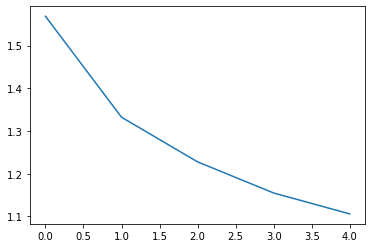

In [ ]:
covnet = CovNet().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.RMSprop(covnet.parameters(), lr=0.001)

start = time.time()

Loss = []
for epoch in range(5):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = covnet(inputs.to(device))
        loss = criterion(outputs, labels.to(device))
        loss.backward()
        optimizer.step()
        
        # print statistics
        running_loss += loss.item()

    print(f'[{epoch + 1}] loss: {running_loss / (i+1)}')
    Loss.append(running_loss / (i+1))
        
plt.plot(Loss)
end = time.time()
print('Finished Training, time: %f'%(end-start))


end = time.time()
print(end-start)

### Adam

[1] loss: 1.5391881588840484
[2] loss: 1.2599738978290558
[3] loss: 1.1408110847282409
[4] loss: 1.0587911184418202
[5] loss: 1.0018589590239524
Finished Training, time: 159.191630
159.19177150726318


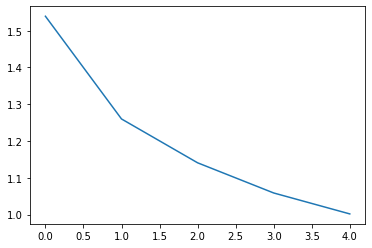

In [ ]:
covnet = CovNet().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(covnet.parameters(), lr=0.001)

start = time.time()

Loss = []
for epoch in range(5):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = covnet(inputs.to(device))
        loss = criterion(outputs, labels.to(device))
        loss.backward()
        optimizer.step()
        
        # print statistics
        running_loss += loss.item()

    print(f'[{epoch + 1}] loss: {running_loss / (i+1)}')
    Loss.append(running_loss / (i+1))
        
plt.plot(Loss)
end = time.time()
print('Finished Training, time: %f'%(end-start))


end = time.time()
print(end-start)

Hitung kembali akurasi

In [ ]:
correct = 0
total = 0
covnet.to('cpu')
# prepare to count predictions for each class
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

# again no gradients needed
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = covnet(images)
        _, predictions = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predictions == labels).sum().item()

        # collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1

print(f'akurasi pada seluruh data tes: {100 * correct // total} %')

# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'akurasi untuk label: {classname:5s} adalah {accuracy:.1f} %')

akurasi pada seluruh data tes: 61 %
akurasi untuk label: plane adalah 62.3 %
akurasi untuk label: car   adalah 75.1 %
akurasi untuk label: bird  adalah 55.6 %
akurasi untuk label: cat   adalah 38.6 %
akurasi untuk label: deer  adalah 50.5 %
akurasi untuk label: dog   adalah 42.3 %
akurasi untuk label: frog  adalah 74.6 %
akurasi untuk label: horse adalah 63.1 %
akurasi untuk label: ship  adalah 83.9 %
akurasi untuk label: truck adalah 68.0 %


Komputasi GPU Parallel
-------------------------

Lakukan perhitungan parallel dengan menggunakan optimisasi adam dan hitung latensinya

1 GPU tersedia
[1] loss: 1.5228442228269576
[2] loss: 1.2528059825253486
[3] loss: 1.1396945405364036
[4] loss: 1.0612298776197433
[5] loss: 1.0012926510226727
Finished Training, time: 166.882997
166.88315677642822


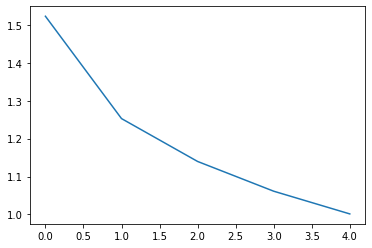

In [ ]:
print(torch.cuda.device_count(), "GPU tersedia")
covnet = CovNet().to(device)
covnet_parallel = nn.DataParallel(covnet)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(covnet_parallel.parameters(), lr=0.001)

start = time.time()

Loss = []
for epoch in range(5):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = covnet_parallel(inputs.to(device))
        loss = criterion(outputs, labels.to(device))
        loss.backward()
        optimizer.step()
        
        # print statistics
        running_loss += loss.item()

    print(f'[{epoch + 1}] loss: {running_loss / (i+1)}')
    Loss.append(running_loss / (i+1))
        
plt.plot(Loss)
end = time.time()
print('Finished Training, time: %f'%(end-start))


end = time.time()
print(end-start)